<a href="https://colab.research.google.com/github/TanushGoel/Machine-Learning-Playground/blob/master/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 -q install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 27kB/s 
     |████████████████████████████████| 491kB 46.1MB/s 
     |████████████████████████████████| 3.2MB 54.4MB/s 


In [0]:
!pip3 -q install keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


In [0]:
tf.__version__

'1.14.0'

In [0]:
tf.keras.__version__

'2.2.4-tf'

In [0]:
!pip3 -q install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanushgoel","key":"853a980360a6b00ffc414a7e499a7aa4"}'}

In [0]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

100% 425M/427M [00:03<00:00, 69.9MB/s]
100% 427M/427M [00:03<00:00, 132MB/s] 


In [0]:
!unzip -o -q 'diabetic-retinopathy-224x224-gaussian-filtered.zip'

In [0]:
image_list_mild = os.listdir('gaussian_filtered_images/gaussian_filtered_images/Mild')
df_data_mild = pd.DataFrame({
    "image_id": image_list_mild,
    "label": "mild"
    })

image_list_moderate = os.listdir('gaussian_filtered_images/gaussian_filtered_images/Moderate')
df_data_moderate = pd.DataFrame({
    "image_id": image_list_moderate,
    "label": "moderate"
    })

image_list_no_dr = os.listdir('gaussian_filtered_images/gaussian_filtered_images/No_DR')
df_data_no_dr = pd.DataFrame({
    "image_id": image_list_no_dr,
    "label": "no_dr"
    })
image_list_proliferate_dr = os.listdir('gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR')
df_data_proliferate_dr = pd.DataFrame({
    "image_id": image_list_proliferate_dr,
    "label": "proliferate_dr"
    })

image_list_severe = os.listdir('gaussian_filtered_images/gaussian_filtered_images/Severe')
df_data_severe = pd.DataFrame({
    "image_id": image_list_severe,
    "label": "severe"
    })

df_data = pd.concat([df_data_mild, df_data_moderate, df_data_no_dr, df_data_proliferate_dr, df_data_severe])

In [0]:
df_data.head()

,image_id,label
0,4ecd1fdd1435.png,mild
1,79ce83c07588.png,mild
2,f762c272c522.png,mild
3,7347f5133a6a.png,mild
4,a3ad6c2db6f1.png,mild


In [0]:
df_data.tail()

,image_id,label
188,c31651ea04c6.png,severe
189,4c60b10a3a6a.png,severe
190,916ec976ff30.png,severe
191,fcc6aa6755e6.png,severe
192,80ca40196225.png,severe


Text(0.5, 1.0, 'Train Class Distributions')

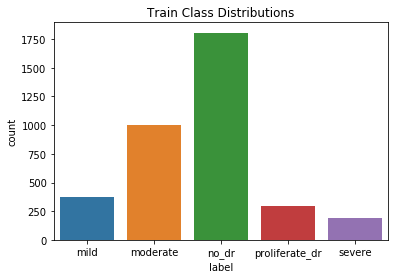

In [0]:
sns.countplot(df_data['label']).set_title('Train Class Distributions')

In [0]:
from sklearn.model_selection import train_test_split

y = df_data['label']

_, df_test = train_test_split(df_data, test_size=0.02725, random_state=42, stratify=y)

_, df_val = train_test_split(df_data, test_size=0.0135, random_state=42, stratify=y)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 50
Test: 100


Text(0.5, 1.0, 'Valid Class Distributions')

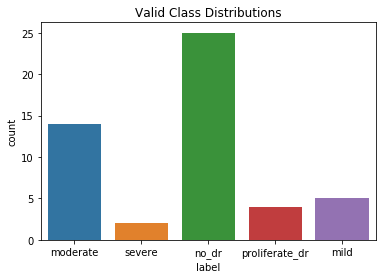

In [0]:
sns.countplot(df_val['label']).set_title('Valid Class Distributions')

Text(0.5, 1.0, 'Test Class Distributions')

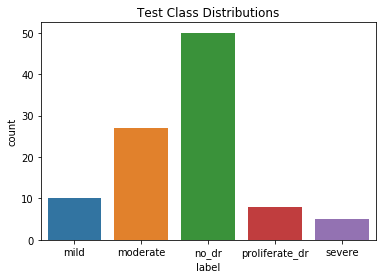

In [0]:
sns.countplot(df_test['label']).set_title('Test Class Distributions')

In [0]:
def identify_train_val_and_test_rows(x):

    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])
    
    if str(x) in val_list:
        return 'val'
    elif str(x) in test_list:
        return 'test'
    else:
        return 'train'

df_data['train_or_val_or_test'] = df_data['image_id']
df_data['train_or_val_or_test'] = df_data['train_or_val_or_test'].apply(identify_train_val_and_test_rows)
df_train = df_data[df_data['train_or_val_or_test'] == 'train']

print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 3562
Valid: 50
Test: 100


Text(0.5, 1.0, 'Train Class Distributions')

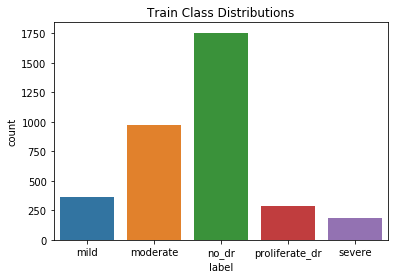

In [0]:
sns.countplot(df_train['label']).set_title('Train Class Distributions')

In [0]:
df_data.set_index('image_id', inplace=True)
df_data.head()

,label,train_or_val_or_test
image_id,,
4ecd1fdd1435.png,mild,train
79ce83c07588.png,mild,train
f762c272c522.png,mild,train
7347f5133a6a.png,mild,train
a3ad6c2db6f1.png,mild,train


In [0]:
if os.path.exists("train_dir"):
  shutil.rmtree("train_dir")
if os.path.exists("val_dir"):
  shutil.rmtree("val_dir")
if os.path.exists("test_dir"):
  shutil.rmtree("test_dir")

train_dir = os.path.join('train_dir')
os.mkdir(train_dir)

val_dir = os.path.join('val_dir')
os.mkdir(val_dir)

test_dir = os.path.join('test_dir')
os.mkdir(test_dir)

os.mkdir(os.path.join(train_dir, 'mild'))
os.mkdir(os.path.join(train_dir, 'moderate'))
os.mkdir(os.path.join(train_dir, 'no_dr'))
os.mkdir(os.path.join(train_dir, 'proliferate_dr'))
os.mkdir(os.path.join(train_dir, 'severe'))

os.mkdir(os.path.join(val_dir, 'mild'))
os.mkdir(os.path.join(val_dir, 'moderate'))
os.mkdir(os.path.join(val_dir, 'no_dr'))
os.mkdir(os.path.join(val_dir, 'proliferate_dr'))
os.mkdir(os.path.join(val_dir, 'severe'))

os.mkdir(os.path.join(test_dir, 'mild'))
os.mkdir(os.path.join(test_dir, 'moderate'))
os.mkdir(os.path.join(test_dir, 'no_dr'))
os.mkdir(os.path.join(test_dir, 'proliferate_dr'))
os.mkdir(os.path.join(test_dir, 'severe'))

In [0]:
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

for image in train_list:
    
    label = df_data.loc[image,'label']

    if label == "mild":
      string_label = "Mild"
    if label == "moderate":
      string_label = "Moderate"
    if label == "no_dr":
      string_label = "No_DR"
    if label == "proliferate_dr":
      string_label = "Proliferate_DR"
    if label == "severe":
      string_label = "Severe"

    src = "/content/gaussian_filtered_images/gaussian_filtered_images/" + string_label + '/' + image
    dst = os.path.join(train_dir, label, image)
    try:
      shutil.copyfile(src, dst)
    except:
      print(src, "could not be found")

for image in val_list:
    
    label = df_data.loc[image,'label']

    if label == "mild":
      string_label = "Mild"
    if label == "moderate":
      string_label = "Moderate"
    if label == "no_dr":
      string_label = "No_DR"
    if label == "proliferate_dr":
      string_label = "Proliferate_DR"
    if label == "severe":
      string_label = "Severe"

    src = "/content/gaussian_filtered_images/gaussian_filtered_images/" + string_label + '/' + image
    dst = os.path.join(val_dir, label, image)
    try:
      shutil.copyfile(src, dst)
    except:
      print(src, "could not be found")
    
for image in test_list:
    
    label = df_data.loc[image,'label']

    if label == "mild":
      string_label = "Mild"
    if label == "moderate":
      string_label = "Moderate"
    if label == "no_dr":
      string_label = "No_DR"
    if label == "proliferate_dr":
      string_label = "Proliferate_DR"
    if label == "severe":
      string_label = "Severe"

    src = "/content/gaussian_filtered_images/gaussian_filtered_images/" + string_label + '/' + image
    dst = os.path.join(test_dir, label, image)
    try:
      shutil.copyfile(src, dst)
    except:
      print(src, "could not be found")

In [0]:
print('Train Total:', len(os.listdir('train_dir/mild'))+len(os.listdir('train_dir/moderate'))+len(os.listdir('train_dir/no_dr'))+len(os.listdir('train_dir/proliferate_dr'))+len(os.listdir('train_dir/severe')))
print('Valid Total:', len(os.listdir('val_dir/mild'))+len(os.listdir('val_dir/moderate'))+len(os.listdir('val_dir/no_dr'))+len(os.listdir('val_dir/proliferate_dr'))+len(os.listdir('val_dir/severe')))
print('Test Total:', len(os.listdir('test_dir/mild'))+len(os.listdir('test_dir/moderate'))+len(os.listdir('test_dir/no_dr'))+len(os.listdir('test_dir/proliferate_dr'))+len(os.listdir('test_dir/severe')), '\n')

print('Train Mild:', len(os.listdir('train_dir/mild')))
print('Train Moderate:', len(os.listdir('train_dir/moderate')))
print('Train No DR:', len(os.listdir('train_dir/no_dr')))
print('Train Proliferate DR:', len(os.listdir('train_dir/proliferate_dr')))
print('Train Severe:', len(os.listdir('train_dir/severe')), '\n')

print('Valid Mild:', len(os.listdir('val_dir/mild')))
print('Valid Moderate:', len(os.listdir('val_dir/moderate')))
print('Valid No DR:', len(os.listdir('val_dir/no_dr')))
print('Valid Proliferate DR:', len(os.listdir('val_dir/proliferate_dr')))
print('Valid Sever:', len(os.listdir('val_dir/severe')), '\n')

print('Test Mild:', len(os.listdir('test_dir/mild')))
print('Test Moderate:', len(os.listdir('test_dir/moderate')))
print('Test No DR:', len(os.listdir('test_dir/no_dr')))
print('Test Proliferate DR:', len(os.listdir('test_dir/proliferate_dr')))
print('Test Severe:', len(os.listdir('test_dir/severe')))

Train Total: 3562
Valid Total: 50
Test Total: 100 

Train Mild: 360
Train Moderate: 972
Train No DR: 1755
Train Proliferate DR: 287
Train Severe: 188 

Valid Mild: 5
Valid Moderate: 14
Valid No DR: 25
Valid Proliferate DR: 4
Valid Sever: 2 

Test Mild: 10
Test Moderate: 27
Test No DR: 50
Test Proliferate DR: 8
Test Severe: 5


In [0]:
image_size = 224

class_list = ['mild','moderate','no_dr','proliferate_dr','severe']

from keras.preprocessing.image import ImageDataGenerator

for item in class_list:
    
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)
    img_class = item
    img_list = os.listdir('train_dir/' + img_class)

    for fname in img_list:
            src = os.path.join('train_dir/' + img_class, fname)
            dst = os.path.join(img_dir, fname)
            shutil.copyfile(src, dst)

    path = aug_dir
    save_path = 'train_dir/' + img_class

    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.025,
        horizontal_flip=True,
        vertical_flip=True, 
        fill_mode='reflect')
    
    batch_size = 10

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(image_size, image_size),
                                              batch_size=batch_size)
    
    num_aug_images_wanted = 1700
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    shutil.rmtree('aug_dir')

Found 360 images belonging to 1 classes.
Found 972 images belonging to 1 classes.
Found 1755 images belonging to 1 classes.
Found 287 images belonging to 1 classes.
Found 188 images belonging to 1 classes.


In [0]:
print('Train Mild:', len(os.listdir('train_dir/mild')))
print('Train Moderate:', len(os.listdir('train_dir/moderate')))
print('Train No DR:', len(os.listdir('train_dir/no_dr')))
print('Train Proliferate DR:', len(os.listdir('train_dir/proliferate_dr')))
print('Train Severe:', len(os.listdir('train_dir/severe')))

Train Mild: 1700
Train Moderate: 1702
Train No DR: 1755
Train Proliferate DR: 1695
Train Severe: 1692


In [0]:
train_path = 'train_dir'
valid_path = 'val_dir'
test_path = 'test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 50
val_batch_size = 50

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [0]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input, 
                             horizontal_flip=True,
                             vertical_flip=True)

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 8544 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [0]:
print(train_batches_bench.class_indices)

{'mild': 0, 'moderate': 1, 'no_dr': 2, 'proliferate_dr': 3, 'severe': 4}


In [0]:
class_weights={
    0: 1.0, 
    1: 1.0, 
    2: 1.0, 
    3: 1.0, 
    4: 1.0, 
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No DR


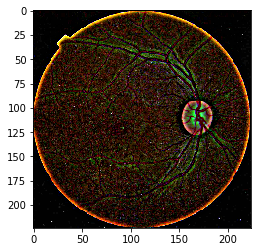

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Proliferate DR


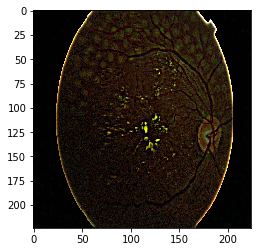

Mild


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


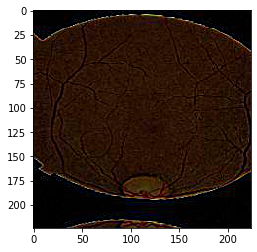

In [0]:
x, y = train_batches_bench.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    if np.argmax(label, axis=0) == 0:
      print('Mild')
    if np.argmax(label, axis=0) == 1:
      print('Moderate')
    if np.argmax(label, axis=0) == 2:
      print('No DR')
    if np.argmax(label, axis=0) == 3:
      print('Proliferate DR')
    if np.argmax(label, axis=0) == 4:
      print('Severe')
    plt.imshow(image)
    plt.show()

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as K

benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Dropout(0.35))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu'))
benchmark.add(Dropout(0.5))
benchmark.add(Dense(5, activation='softmax'))
benchmark.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      9248      


In [0]:
from keras import metrics
benchmark.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='diabetic_retinopathy_bench_best.hdf5', verbose=1, save_best_only=True)

history_benchmark = benchmark.fit_generator(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_benchmark], 
                                            epochs=25, 
                                            verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
72/72 [==============================] - 642s 9s/step - loss: 1.2887 - acc: 0.4353 - val_loss: 1.1506 - val_acc: 0.5400

Epoch 00001: val_loss improved from inf to 1.15062, saving model to diabetic_retinopathy_bench_best.hdf5
Epoch 2/25
72/72 [==============================] - 645s 9s/step - loss: 1.1858 - acc: 0.4992 - val_loss: 1.0578 - val_acc: 0.6800

Epoch 00002: val_loss improved from 1.15062 to 1.05783, saving model to diabetic_retinopathy_bench_best.hdf5
Epoch 3/25
72/72 [==============================] - 641s 9s/step - loss: 1.1074 - acc: 0.5208 - val_loss: 1.0752 - val_acc: 0.7000

Epoch 00003: val_loss did not improve from 1.05783
Epoch 4/25
72/72 [==============================] - 640s 9s/step - loss: 1.1117 - acc: 0.5364 - val_loss: 0.9477 - val_acc: 0.7400

Epoch 00004: val_loss improved from 1.05783 to 0.94767, saving model to diabetic_retinopathy_bench_best.hdf5
Epoc

In [0]:
def plot_training(history):
  
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

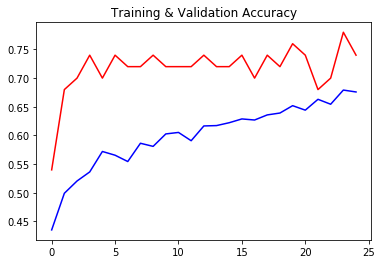

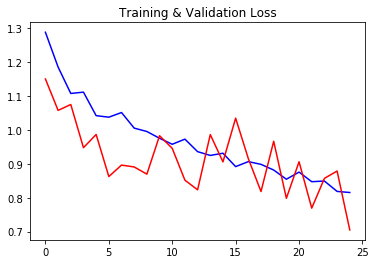

In [0]:
plot_training(history_benchmark)

In [0]:
benchmark.load_weights('diabetic_retinopathy_bench_best.hdf5')

In [0]:
preds = benchmark.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)

100/100 [==============================] - 6s 56ms/step


In [0]:
y_pred = np.argmax(preds, axis=1)
y_true = test_batches_bench.classes

In [0]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')

Accuracy: 0.800%
Balanced Accuracy: 0.554%


In [0]:
from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()

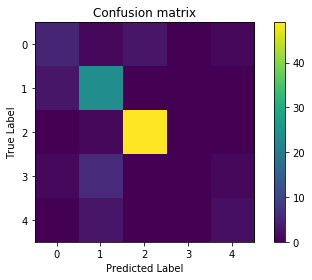

In [0]:
matrix()

In [0]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[ 5,  1,  3,  0,  1],
       [ 3, 24,  0,  0,  0],
       [ 0,  1, 49,  0,  0],
       [ 1,  6,  0,  0,  1],
       [ 0,  3,  0,  0,  2]])

In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.69      0.89      0.77        27
           2       0.94      0.98      0.96        50
           3       0.00      0.00      0.00         8
           4       0.50      0.40      0.44         5

    accuracy                           0.80       100
   macro avg       0.54      0.55      0.54       100
weighted avg       0.74      0.80      0.76       100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


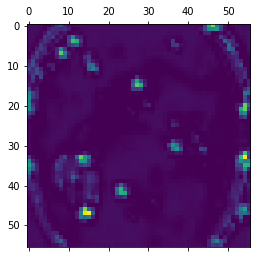

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


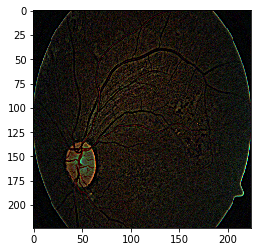

Severe


In [0]:
last_conv_layer = benchmark.layers[10]

x, y = valid_batches_bench.next()

output = benchmark.output[:, y_pred[0]]
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(32):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

plt.imshow(x[0])
plt.show()
label = y[0]
if np.argmax(label, axis=0) == 0:
  print('Mild')
if np.argmax(label, axis=0) == 1:
  print('Moderate')
if np.argmax(label, axis=0) == 2:
  print('No DR')
if np.argmax(label, axis=0) == 3:
  print('Proliferate DR')
if np.argmax(label, axis=0) == 4:
  print('Severe')

In [0]:
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [0]:
filter_whole, layer_whole = get_name_layer_filters(benchmark)

conv2d_1 (3, 3, 3, 16)
conv2d_2 (3, 3, 16, 16)
conv2d_3 (3, 3, 16, 16)
conv2d_4 (3, 3, 16, 32)
conv2d_5 (3, 3, 32, 32)
conv2d_6 (3, 3, 32, 32)
conv2d_7 (3, 3, 32, 64)
conv2d_8 (3, 3, 64, 64)
conv2d_9 (3, 3, 64, 64)


In [0]:
cam_layer = benchmark.layers[2]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 16, 16)
(16,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

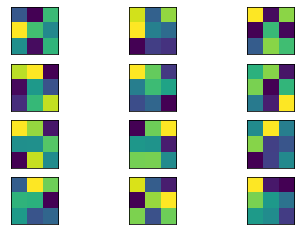

In [0]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
from keras.models import Model
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [0]:
x, y = valid_batches_bench.next()
test_label = y[0]
test_image = x[0]
test_image_np = np.expand_dims(test_image, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No DR


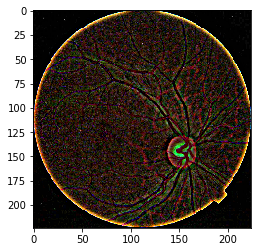

In [0]:
if np.argmax(test_label, axis=0) == 0:
    print('Mild')
if np.argmax(test_label, axis=0) == 1:
    print('Moderate')
if np.argmax(test_label, axis=0) == 2:
    print('No DR')
if np.argmax(test_label, axis=0) == 3:
    print('Proliferate DR')
if np.argmax(test_label, axis=0) == 4:
    print('Severe')
plt.imshow(test_image)

In [0]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 224, 224, 16)

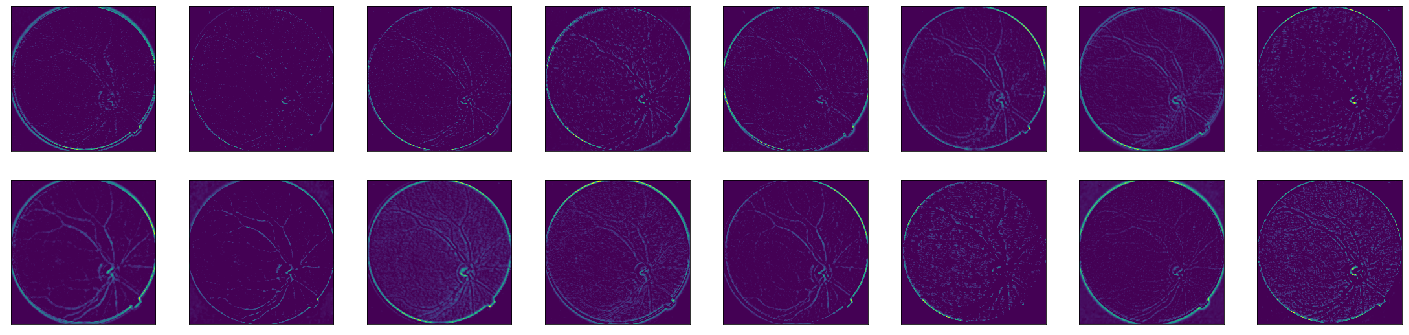

In [0]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(4):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [0]:
cam_layer = benchmark.layers[6]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 32, 32)
(32,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

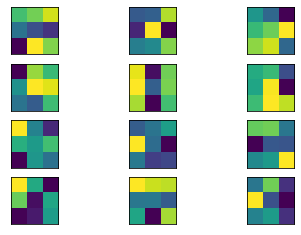

In [0]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show() 

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [0]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 112, 112, 32)

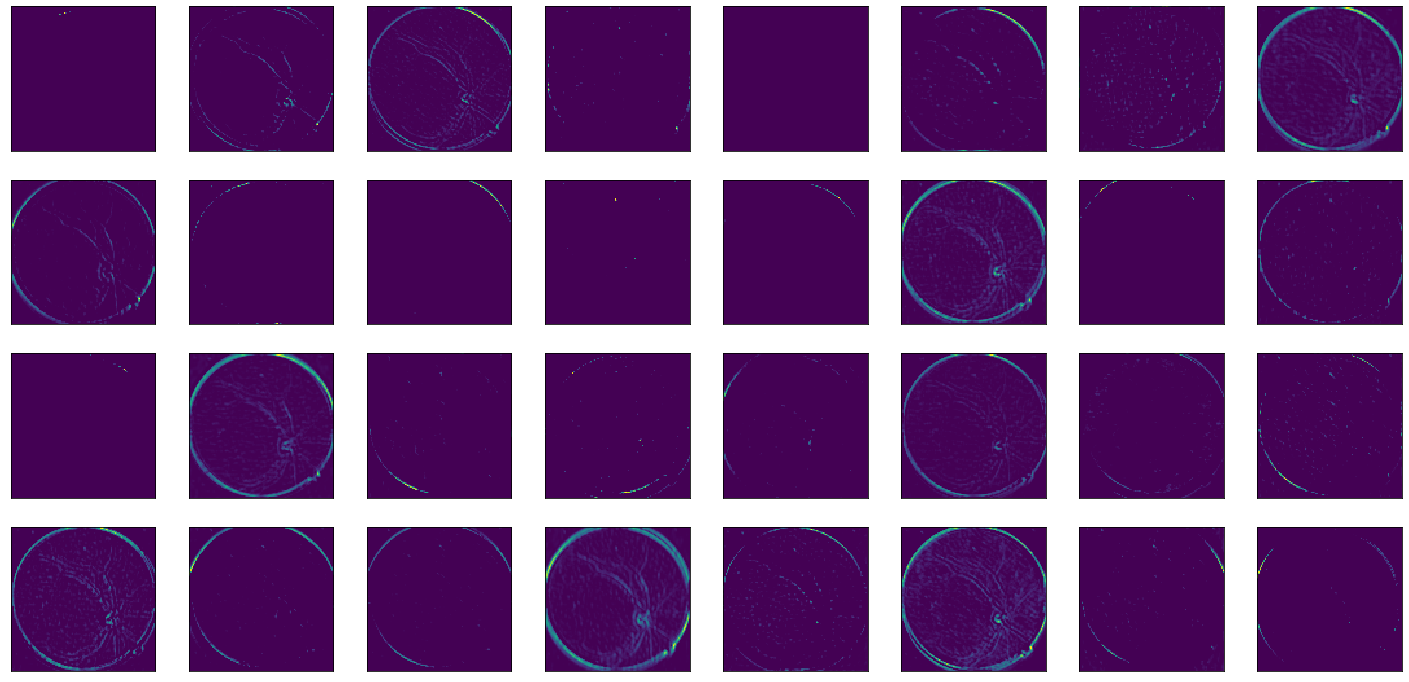

In [0]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [0]:
cam_layer = benchmark.layers[10]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 64, 64)
(64,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

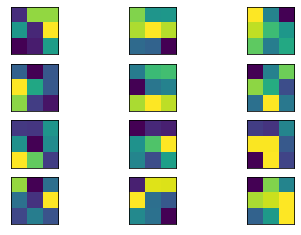

In [0]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [0]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 56, 56, 64)

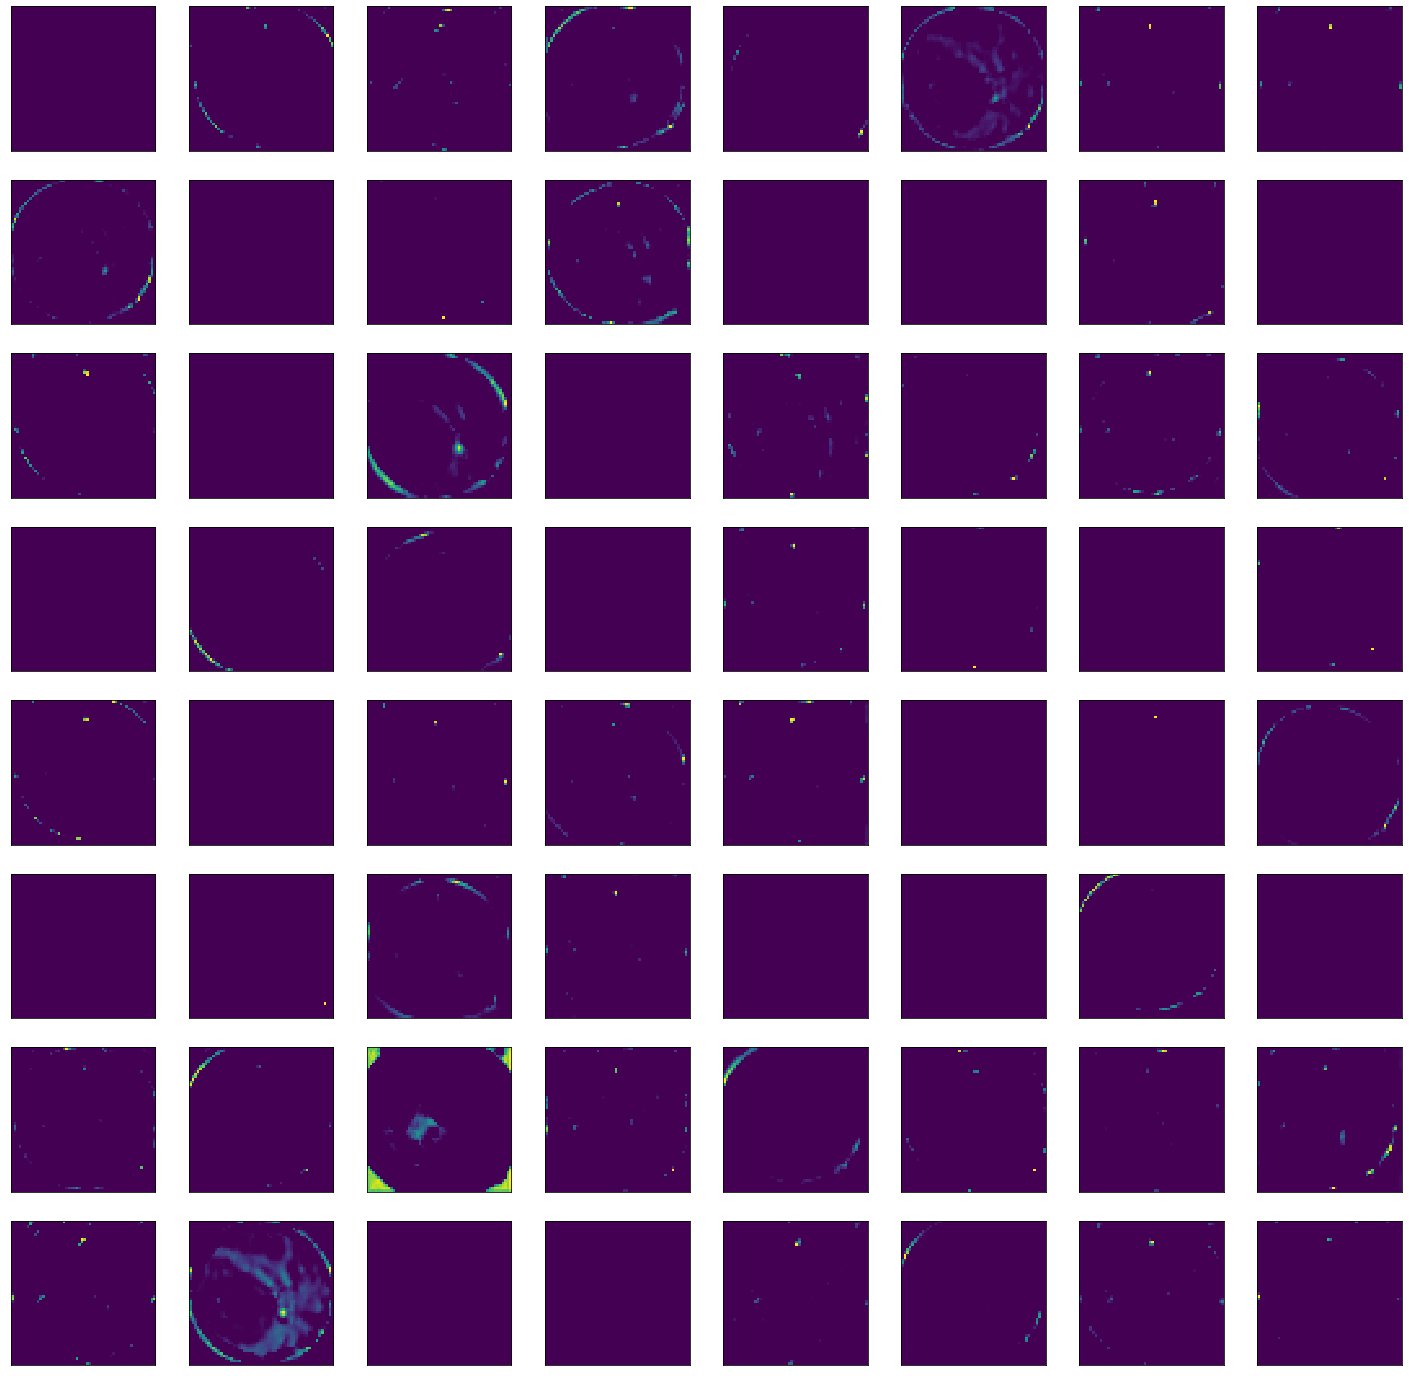

In [0]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(8):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()